1.파이토치 코드 텐서플로우에 적용하여 텐서플로우 능력 강화와 코드 이해 상승

2.tfds의 사용과 데이터 파이프라인의 이해가 너무 어렵다.



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import os
from keras.models import model_from_json 
import time

# GAN 모델을 돌리기 위한 GPU 셋팅

- 밑에 나오는 excuting gpu가 실행 결과

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.device('/device:GPU:2')

# tfds에서 데이터 셋 불러오기

In [ ]:
data, info = tfds.load("mnist", with_info=True)
print(info)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelInterleaveDatasetV4 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssertCardinalityDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DummyMemoryCache in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op CacheDatasetV2 in device /job:localhost/replica:0/task

In [ ]:
train_data, test_data = data['train'], data['test']

for data in train_data.take(1):
  print(data["image"].shape, data["label"].shape)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
(28, 28, 1) ()
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


# tensorslice를 위한 시행착오

-> 결과 : 자료가 너무 없는 거 보니 할 필요 없어 보인다.

In [ ]:
'''
def preprocessing2(data):
  image = data["image"]
  label = data["label"]

  dataset = tf.data.Dataset.from_tensor_slices(({"image":image}, label))
  return dataset

train_data = train_data.map(preprocessing2)
'''

ValueError: ignored

# from_tensor_slice > batch > iterator 순

In [ ]:
# 이미지 데이터 전처리(정규화 + 소수화)
def preprocessing(data):
  image = tf.cast(data["image"], tf.float32) / 255.0
  label = data["label"]
  return image, label


BATCH_SIZE = 32
train_data = train_data.map(preprocessing).shuffle(1000).batch(BATCH_SIZE) # mnist를 배치사이즈 크기로 다 묶어서 가져옴
test_data = test_data.map(preprocessing).batch(BATCH_SIZE)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
# 4차원 접근
for data in train_data.take(1):
  print(data[0].shape, data[1].shape)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
(32, 28, 28, 1) (32,)
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
# 3차원 접근
for data in train_data.take(1):
  print(data[0][0].shape, data[1][0].shape)

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
(28, 28, 1) ()
Executing 

새롭게 찾은 네이버 ai 랩의 코드 분석을 해보자 but 여기도 배치사이즈만큼 입력을 넣는다 > 이게 일반적인 경우인가?? 생각해보아야 한다


-> ★ 생각해보면 model.fit에도 batch_size를 파라미터로 넣어줬다 > 즉 내가 지금 tf의 파이프라인 때문에 헷갈렸는데 훈련은 무조건 배치사이즈를 지정해줘야한다.

# 모델 구축하기

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### tensorflow 1.x에만 있는 함수 이슈

-> 해결 블로그 : https://pythonguides.com/tensorflow-next_batch/

위 블로그에서는 1.x에서만 쓸 수 있는 함수인 next_batch를 직접 구현하고 있다. 내가 만약 이 코드를 가지고 문제를 해결했다면 이런 코드를 내가 저장하고 있으면 좋겠네?

-> tensorflow 2.x 버전으로 내가 바꾸자

In [3]:
# 가중치 저장 함수
def save_weight_to_json(model):
  cur_dir = os.getcwd() # 현재 작업 디렉
  ckpt_dir = "checkpoints" # weight를 저장할 디렉토리
  file_name = "gan_weights.ckpt" # 저장 파일명
  dir = os.path.join(cur_dir, ckpt_dir) 
  os.makedirs(dir, exist_ok = True) # dir이라는 폴더를 만듬

  file_path = os.path.join(dir, file_name) #dir 경로 + 파일 이름의 파일 경로를 join함
  model.save_weights(file_path)

  model_json = model.to_json() # 모델 구조도 저장하여 model.json으로 저장
  with open("model.json", "w") as json_file : 
    json_file.write(model_json)

# 가중치 로드
def load_weight_to_json():
  json_file = open("model.json", "r")
  loaded_model_json = json_file.read() 
  json_file.close()

  loaded_model = model_from_json(loaded_model_json)

# 그래프를 생성하는 함수
def plotLoss(G_loss, D_loss, epoch):
  cur_dir = os.getcwd()
  loss_dir = "loss_graph"
  file_name = 'gan_loss_epoch_%d.png' % epoch
  dir = os.path.join(cur_dir, loss_dir) 
  os.makedirs(dir, exist_ok = True)

  file_path = os.path.join(dir, file_name)

  plt.figure(figsize=(10, 8))
  plt.plot(D_loss, label='Discriminitive loss')
  plt.plot(G_loss, label='Generative loss')
  plt.xlabel('BatchCount')
  plt.ylabel('Loss')
  plt.legend()
  plt.savefig(file_path)

# 이미지를 저장하는 함수
def sample_images(epoch, latent_dim = 128):
  cur_dir = os.getcwd()
  image_dir = "images"
  file_name = '%d.png' % epoch
  dir = os.path.join(cur_dir, image_dir) 
  os.makedirs(dir, exist_ok = True)

  file_path = os.path.join(dir, file_name)


  r, c = 5, 5
  noise = np.random.normal(0, 1, (r * c, latent_dim))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig(file_path)
  plt.close()

# 모델을 로드하는 함수
def load_model(model, model_path='saved_model/model.h5'):
  print('\nload model : \"{}\"'.format(model_path))
  model = tf.keras.models.load_model(model_path)

# 모델을 저장하는 함수
def save_model(model, model_path='saved_model/model.h5'):
  print('\nsave model : \"{}\"'.format(model_path))
  model.save(model_path)

In [4]:
img_rows = 28 
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

z_dim = 128
total_epoch = 1000
batch_size = 100
learning_rate = 0.0001
n_hidden = 256

### 생성자

In [5]:
def build_generator(img_shape, z_dim):
  model = Sequential()

  model.add(Dense(n_hidden, input_dim = z_dim)) # 인풋은 100 다음은 128개의 노드
  model.add(LeakyReLU(alpha = 0.01))
  model.add(Dense(28 * 28 * 1, activation="tanh")) # 128개의 노드 다음은 784개의 노드

  model.add(Reshape(img_shape))
  return model

### 판별자

In [6]:
def build_discriminator(img_shape):
  model = Sequential()

  model.add(Flatten(input_shape = img_shape)) # 이미지 모양대로 입력받아서 폄
  model.add(Dense(n_hidden))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(1, activation="sigmoid"))

  return model

### 훈련 시작

In [7]:
def build_gan(generator, discriminator):

    model = Sequential()

    # 생성자 -> 판별자로 연결된 모델
    model.add(generator)
    model.add(discriminator)

    return model

In [8]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss="binary_crossentropy", # 맞다 아니다
                      optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)

discriminator.trainable = False # 생성자를 훈련하는 동안 판별자가 훈련되지 않도록 동결 
# -> 참 신기한게  train 함수에 생성자, 판별자 생성을 넣은 것도 아니고 .trainable = False를 밖에서 그냥 한 건데 훈련시 동결이 된대 이게 라이브러리 메소드의 힘이다!!

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [9]:
def train(total_epoch, batch_size, sample_interval):

    # MNIST 데이터셋 로드
    (X_train, _), (_, _) = mnist.load_data()

    # [0, 255] 흑백 픽셀 값을 [-1, 1] 사이로 스케일 조정 ∵ 생성자의 끝이 tanh라서 판별자의 모든 입력 범위를 맞춰야함
    X_train = X_train / 127.5 - 1.0 # -> 0 / 127.5 = 0 > 0-1 = '-1'/ 255 / 127.5 = 2 > 2-1 = '1'


    X_train = np.expand_dims(X_train, axis=3) #60000, 28, 28, 1

    # 진짜 이미지 레이블: 모두 1
    real = np.ones((batch_size, 1))

    # 가짜 이미지 레이블: 모두 0
    fake = np.zeros((batch_size, 1))

    D_loss_list = []
    G_loss_list = []
    for iteration in range(total_epoch):

        # -------------------------
        #  판별자 훈련
        # -------------------------

        # 진짜 이미지에서 랜덤 배치 가져오기
        # np.random.randint(최소값, 미만값, size) - 랜덤한 정수 추출
        idx = np.random.randint(0, X_train.shape[0], batch_size) # 0 ~ 60000 사이의 수에서 128개의 수를 뽑음
        imgs = X_train[idx] # 그것을 fancy 인덱싱하면 랜덤으로 뽑은 수(행)에 해당하는 mnist 이미지가 생김








        # 가짜 이미지 배치 생성
        z = np.random.normal(0, 1, (batch_size, z_dim)) #0~1수 128행 100열을 만듬
        gen_imgs = generator.predict(z) #이게 왜 되지? -> 시퀀셜 모델일 뿐이니 predict 인정 model.predict임

        # 판별자 훈련
        d_loss_real = discriminator.train_on_batch(imgs, real) # 이게 케라스 라이브러임 fit과 같은 거임 와,,,,

        # gen_imgs는 어딨음? 밑에 있음 ㅋㅋ
        # 보다시키 train은 하나지만 d를 두번 훈련하고 그때 실제 데이터에는 1 가짜에는 0을 주는 것은 첫걸음과 동일
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake) 
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)





        # ---------------------
        #  생성자 훈련
        # ---------------------

        # 가짜 이미지 배치 생성
        z = np.random.normal(0, 1, (batch_size, z_dim)) # 가짜 이미지에 넣을 크기 100(z_dim = 100차원)의 벡터를 생성
        gen_imgs = generator.predict(z)

        # 생성자 훈련
        g_loss = gan.train_on_batch(z, real) # 생성자는 가짜가 1이라고 말함 -> gan으로 하는 이유는 생성자는 판별자도 필요함 = 판별자의 오차로 생성자를 훈련하니

        G_loss_list.append(g_loss)
        D_loss_list.append(d_loss)
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration, d_loss, 100*d_loss[1], g_loss))

        if total_epoch % sample_interval == 0:
          sample_images(total_epoch)
    plotLoss(G_loss_list, D_loss_list, total_epoch)



1/1 [==============================] - 0s 19ms/step


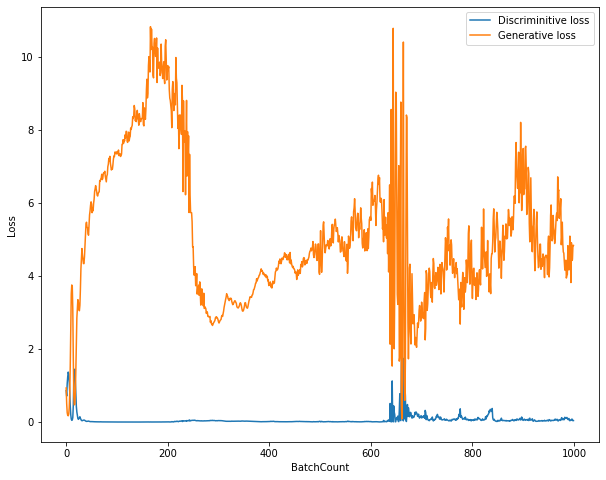

In [10]:
# 하이퍼파라미터 설정
total_epoch = 1000
sample_interval = 1000 # 1000에폭에 저장해라

# 지정된 반복 횟수만큼 GAN 훈련
train(total_epoch, batch_size, sample_interval)

In [11]:
save_weight_to_json(gan)
save_model(gan)


save model : "saved_model/model.h5"
